In [9]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [10]:
df = pd.read_csv(r'C:\Users\Dell\medical_cost_insurance.csv')

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
df.shape

(1338, 7)

In [13]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338.0,NaN,NaN,NaN,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [14]:
#checking for null values
df.isna().sum().sort_values(ascending = False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

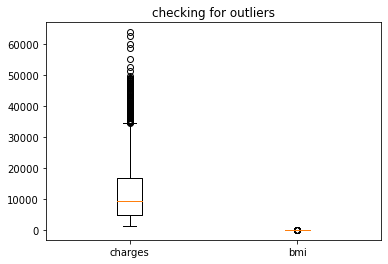

In [15]:
#checking for outliers
plt.boxplot(df[['charges', 'bmi']],labels=['charges', 'bmi'])
plt.title('checking for outliers');

In [16]:
#creating helper function to change values
def optimise_higher_values(n):
    if n>=upper_limit:
        return upper_limit
    return n

In [17]:
# looping through the columns and changing the values
cols = ['charges', 'bmi']

for i in cols:
    perc_25 = df[i].quantile(.25)
    perc_75 = df[i].quantile(.75)

    iqr = perc_75 - perc_25

    upper_limit = perc_75 + 1.5 * iqr
    df[i]=df[i].apply(optimise_higher_values)

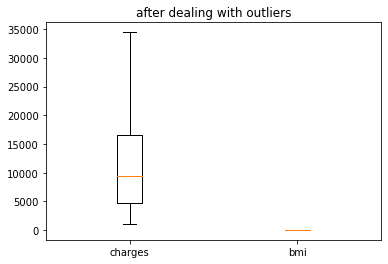

In [18]:
plt.boxplot(df[['charges', 'bmi']],labels=['charges', 'bmi'])
plt.title('after dealing with outliers');

Text(0.5, 1.0, 'correlation of all features with target charges column')

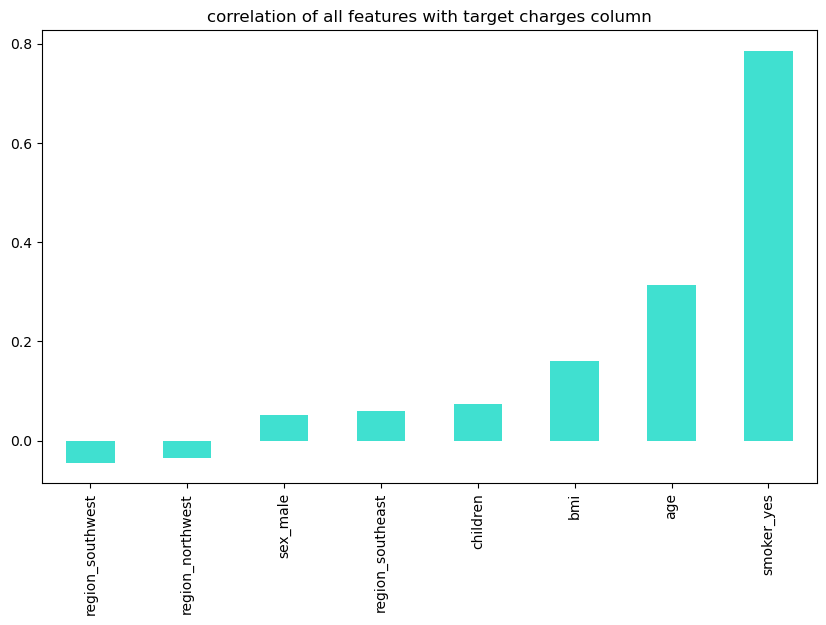

In [19]:
# checking correlation
plt.figure(figsize=(10,6),dpi=100)
pd.get_dummies(df,drop_first=True).corr()['charges'].sort_values()[:-1].plot(kind='bar',color='turquoise')
plt.title('correlation of all features with target charges column')

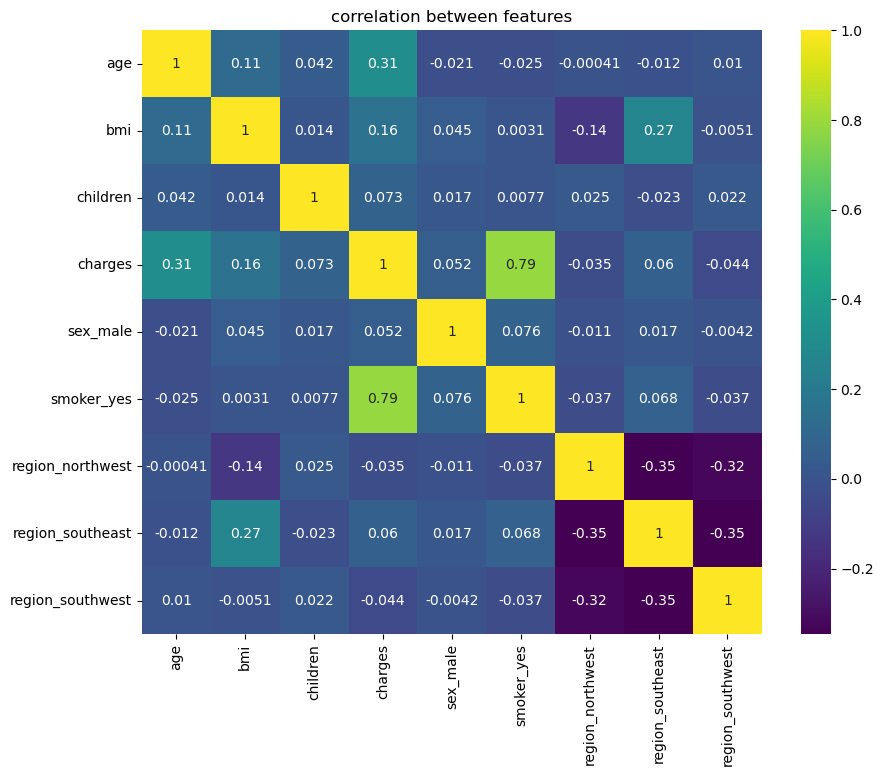

In [20]:
#plotting heatmap
plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(pd.get_dummies(df,drop_first=True).corr(),annot=True,cmap='viridis')
plt.title('correlation between features');

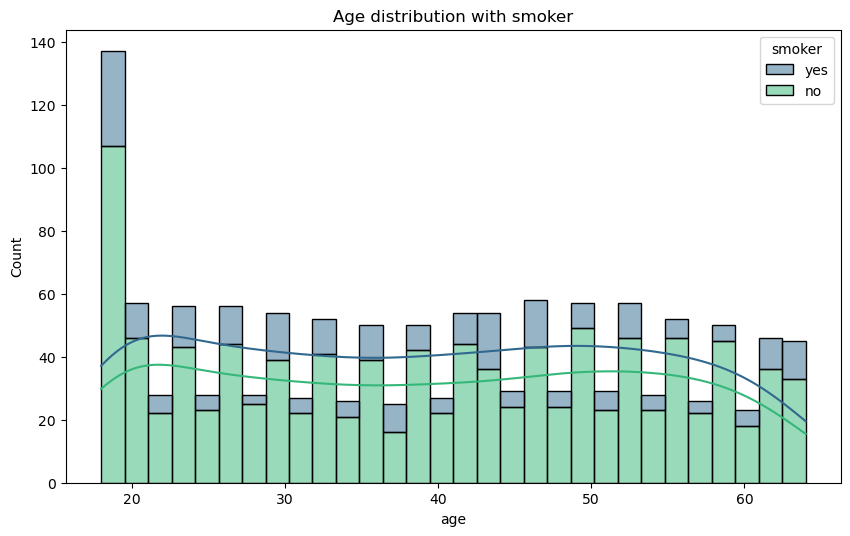

In [21]:
plt.figure(figsize=(10,6),dpi=100)
sns.histplot(data=df,x='age',hue='smoker',multiple='stack',bins=30,kde=True,palette='viridis')
plt.title('Age distribution with smoker');

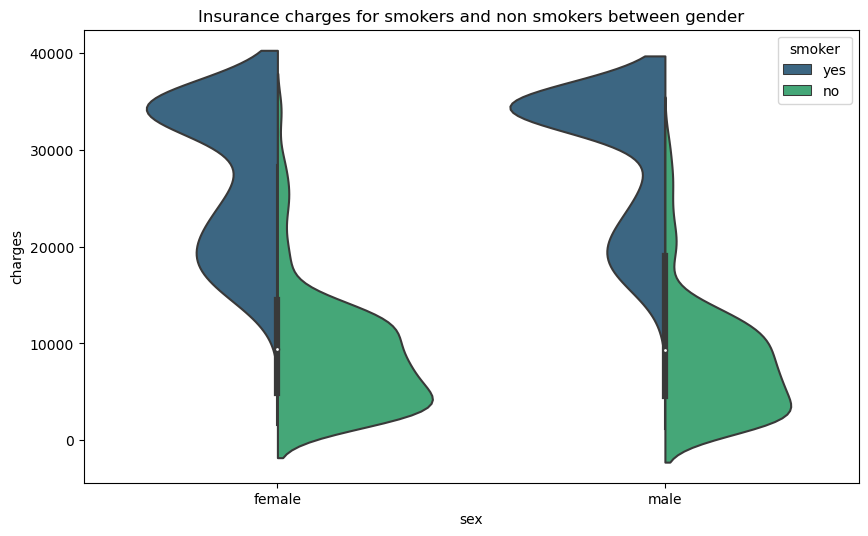

In [22]:
plt.figure(figsize=(10,6),dpi=100)
sns.violinplot(data=df,x='sex',y='charges',hue='smoker',split=True,palette='viridis')
plt.title('Insurance charges for smokers and non smokers between gender');

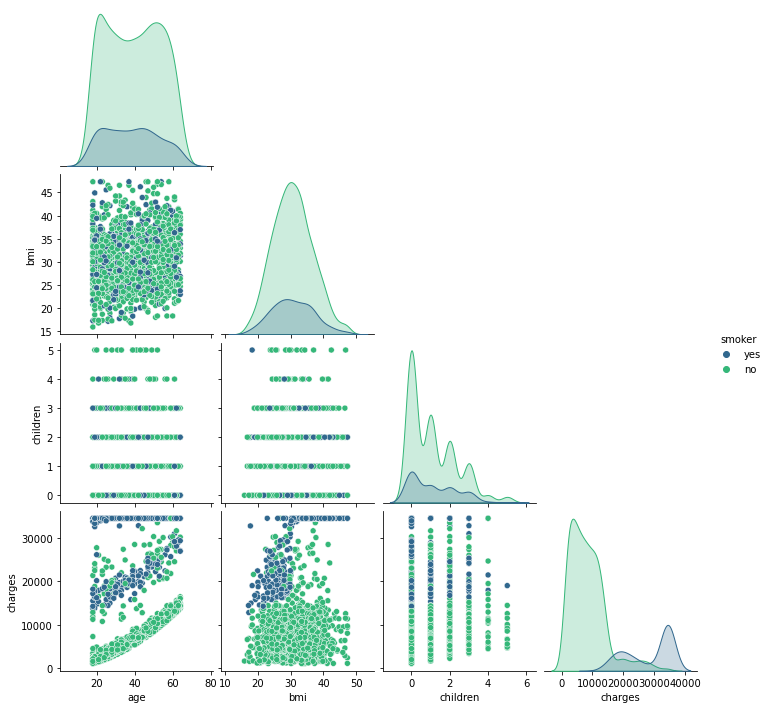

In [23]:
#checking distribution between features using pairplot
sns.pairplot(df,hue='smoker',corner=True,palette='viridis');

In [24]:
#creating formula
ols_formula = 'charges ~ C(smoker)'

In [25]:
#using OLS
OLS = ols(formula=ols_formula,data=df)

In [26]:
# fitting the OLS
model = OLS.fit()

In [27]:
# checking the summary results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     2159.
Date:                Fri, 05 May 2023   Prob (F-statistic):          2.93e-281
Time:                        19:24:13   Log-Likelihood:                -13599.
No. Observations:                1338   AIC:                         2.720e+04
Df Residuals:                    1336   BIC:                         2.721e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         8429.3971    192.614     43.763      0.000    8051.539    8807.256
C(smoker)[T.yes]  1.978e+04    425.638     46.464      0.000    1.89e+04    2.06e+04
==============================================================================
Omnibus:                      170.645   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.870
Skew:                           0.852   Prob(JB):                     1.02e-61
Kurtosis:                       4.460   Cond. No.                         2.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# using one way ANOVA testing
sm.stats.anova_lm(model,type=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(smoker),1.0,8.522191e+10,8.522191e+10,2158.911216,2.929025e-281
Residual,1336.0,5.273791e+10,3.947449e+07,NaN,NaN


In [29]:
df = pd.get_dummies(df,drop_first=True)
df.head(2)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,0,1,0,0,1
1,18,33.77,1,1725.5523,1,0,0,1,0


In [30]:
X = df.drop('charges',axis=1)
y=df['charges']

In [31]:
# setting test size to 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [32]:
#instantiating standard scaler
scale = StandardScaler()

In [33]:
#scaling data
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [34]:
# instantiating linear regression
l_model = LinearRegression()

In [35]:
l_model.fit(X_train_scaled,y_train)

LinearRegression()

In [36]:
y_pred = l_model.predict(X_test_scaled)

In [37]:
MAE_linear = mean_absolute_error(y_test,y_pred)

In [38]:
RMSE_linear = np.sqrt(mean_squared_error(y_test,y_pred))

In [39]:
model_score = round(l_model.score(X_test_scaled,y_test),3)

In [40]:
df_linear = pd.DataFrame(data = {'MAE':MAE_linear,'RMSE':RMSE_linear,'model_score':model_score},index=['Linear_Regression'])
df_linear

,MAE,RMSE,model_score
Linear_Regression,3396.262798,5060.59142,0.759


In [41]:
# looping through polynomial features 2,3,4 and checking MAE and RMSE
MAE=[]
RMSE=[]
r2_score_list=[]
for i in range(2,5):
    poly_model = PolynomialFeatures(degree=i)
    X_train_poly=poly_model.fit_transform(X_train_scaled)
    X_test_poly = poly_model.transform(X_test_scaled)
    l_model.fit(X_train_poly,y_train)
    y_pred = l_model.predict(X_test_poly)
    MAE.append(mean_absolute_error(y_test,y_pred))
    RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))
    r2_score_list.append(l_model.score(X_test_poly,y_test))

In [42]:
MAE

[2685.224789314179, 2737.012845937313, 3166.3871396686563]

In [43]:
RMSE

[4559.751721881029, 4621.868773219417, 5350.834884029252]

In [44]:
r2_score_list

[0.8047082937361647, 0.7993511712318584, 0.7310667456279831]

In [45]:
df_poly = pd.DataFrame(data = {'MAE':MAE[0],'RMSE':RMSE[0],'model_score':round(r2_score_list[0],3)},index=['Polynomial_Regression(degree = 2)'])
df_poly

,MAE,RMSE,model_score
Polynomial_Regression(degree = 2),2685.224789,4559.751722,0.805


In [46]:
rf_model = RandomForestRegressor()

In [47]:
rf_model.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [48]:
y_pred = rf_model.predict(X_test_scaled)

In [49]:
MAE_rf = mean_absolute_error(y_test,y_pred)

In [50]:
RMSE_rf = np.sqrt(mean_squared_error(y_test,y_pred))

In [51]:
rf_score = round(rf_model.score(X_test_scaled,y_test),3)

In [52]:
df_rf= pd.DataFrame(data = {'MAE':MAE_rf,'RMSE':RMSE_rf,'model_score':round(rf_score,3)},index=['Random_forest_regressor'])
df_rf

,MAE,RMSE,model_score
Random_forest_regressor,2291.938025,4445.064248,0.814


In [53]:
params = {'n_estimators':[70,80,90,92,95,100],'criterion' : ['friedman_mse', 'absolute_error', 'squared_error', 'poisson'],'max_depth':[3,4,6,9,None],'max_features' : ["auto", "sqrt", "log2"]}

In [54]:
grid_model = GridSearchCV(estimator=rf_model,param_grid=params)

In [57]:
%%time
grid_model.fit(X_train_scaled,y_train)

CPU times: total: 8min 57s
Wall time: 9min 46s


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['friedman_mse', 'absolute_error',
                                       'squared_error', 'poisson'],
                         'max_depth': [3, 4, 6, 9, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [70, 80, 90, 92, 95, 100]})

In [58]:
grid_model.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 100}

In [59]:
rf_cv=grid_model.best_score_

In [60]:
y_pred = grid_model.predict(X_test_scaled)

In [61]:
MAE_rf_cv=mean_absolute_error(y_test,y_pred)

In [62]:
RMSE_rf_cv=np.sqrt(mean_squared_error(y_test,y_pred))

In [63]:
df_rf_cv= pd.DataFrame(data = {'MAE':MAE_rf_cv,'RMSE':RMSE_rf_cv,'model_score':round(rf_cv,3)},index=['Random_forest_regressor with Grid Search'])
df_rf_cv

,MAE,RMSE,model_score
Random_forest_regressor with Grid Search,2249.393031,4278.144838,0.814


In [64]:
#checking feature importance
df_feat = pd.DataFrame(data={'name' : X.columns,'feat':grid_model.best_estimator_.feature_importances_}).sort_values('feat',ascending=False)
df_feat

,name,feat
4,smoker_yes,0.728614
0,age,0.148539
1,bmi,0.111388
2,children,0.010830
7,region_southwest,0.000223
3,sex_male,0.000214
5,region_northwest,0.000118
6,region_southeast,0.000072


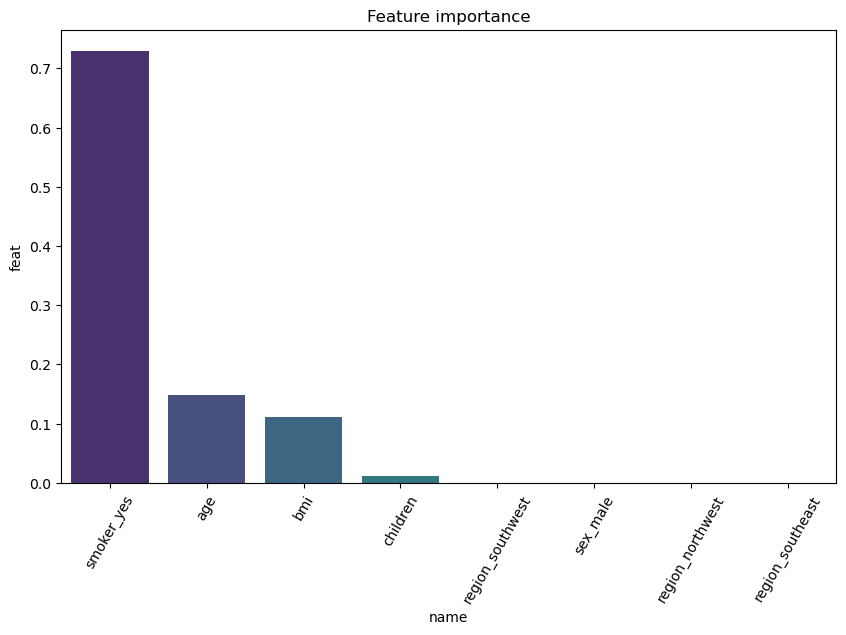

In [65]:
plt.figure(figsize=(10,6),dpi=100)
sns.barplot(data=df_feat,x='name',y='feat',palette='viridis')
plt.xticks(rotation = 60)
plt.title('Feature importance');

In [66]:
df_1 = pd.concat([df_linear,df_poly])
df_1

,MAE,RMSE,model_score
Linear_Regression,3396.262798,5060.591420,0.759
Polynomial_Regression(degree = 2),2685.224789,4559.751722,0.805


In [67]:
df_2 = pd.concat([df_rf,df_rf_cv])
df_2

,MAE,RMSE,model_score
Random_forest_regressor,2291.938025,4445.064248,0.814
Random_forest_regressor with Grid Search,2249.393031,4278.144838,0.814


In [68]:
df_final = pd.concat([df_1,df_2])
df_final

,MAE,RMSE,model_score
Linear_Regression,3396.262798,5060.591420,0.759
Polynomial_Regression(degree = 2),2685.224789,4559.751722,0.805
Random_forest_regressor,2291.938025,4445.064248,0.814
Random_forest_regressor with Grid Search,2249.393031,4278.144838,0.814


In [69]:
df_final.sort_values(['MAE','RMSE'],ascending=[True,True])

,MAE,RMSE,model_score
Random_forest_regressor with Grid Search,2249.393031,4278.144838,0.814
Random_forest_regressor,2291.938025,4445.064248,0.814
Polynomial_Regression(degree = 2),2685.224789,4559.751722,0.805
Linear_Regression,3396.262798,5060.591420,0.759


In [70]:
rf_model_final = RandomForestRegressor(criterion= 'poisson',max_depth= 4,max_features= 'auto',n_estimators= 80)

In [71]:
#fitting final model to entire dataset
rf_model_final.fit(X,y)

RandomForestRegressor(criterion='poisson', max_depth=4, n_estimators=80)

In [72]:
#dummy data
test1 = [[30,76,1,1,1,1,0,0]]

In [73]:
rf_model_final.predict(test1)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([34176.14524672])